# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [39]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
        
        PCA will reduce feature dimension by choosing major feature. First 2 component might be
        1. food's category(fresh or milk or grocery)
        2. processed food or household item (detergents paper or delicate essen or frozen).
        
        ICA can separate blind source. 
        So I think ICA will show source vector for customer's type which maybe a restautant or coffee shop.

###PCA

In [24]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:  
        
        First 2 dimensions, it is almost the same variance ( 0.46 and 0.40). 
        Variance from dimension after this drop rapidly to 0.07,0.04,0.01 and 0.006. 
        
        I would choose 2 dimensions for analysis,
        because from 3rd dimesion the variance is very small compare to first 2 dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
    
    First component 
        - [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471].
        - The value is large at Fresh's feature(-0.98).
    
    Second component
        - [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921].
        - Milk(0.52), Grocery(0.77) and Detergent paper(0.37) feature has large value.
    
    - Fresh feature is the most important feature.
    - combination of Milk, Grocery and Detergent paper feature are second important features
    
    To use this information, I will tranform original data to these 2 components vector. 
    Which will reduces number of feature dimension from 6 dimension to 2 dimension and cluster it.

###ICA

In [38]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
ica = FastICA(n_components=4)
data_scaled = preprocessing.scale(data)
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[-0.00303262 -0.01303026 -0.01935923 -0.0024829  -0.02027917  0.00772866]
 [-0.01079208 -0.00257802  0.00212412  0.05431661  0.00343228 -0.01575329]
 [ 0.00573528 -0.01139934  0.00431015  0.00323743  0.00983657 -0.04604594]
 [-0.04966921 -0.00018728 -0.00054579  0.00373883  0.0013023   0.00600066]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?


##Answer
    
    ICA decomposite data in to 4 component.
    These component are considerly to be restaurant,deli counter,coffee shop and fresh market customers.

    1st component 
       - [-0.00303262 -0.01303026 -0.01935923 -0.0024829 -0.02027917 0.00772866]
       - has high multiplier of milk,grocery and detergents paper.
       - It looks like a restaurant.

    2th component
       - [-0.01079208 -0.00257802  0.00212412  0.05431661  0.00343228 -0.01575329]
       - has high multiplier of frozen, fresh and delicatessen.
       - Which could be a deli counter.
   
    3rd component 
       - [ 0.00573528 -0.01139934  0.00431015  0.00323743  0.00983657 -0.04604594]
       - has high multiplier of milk and delicatessen.
       - It could be a coffee shop.
    
    4nd component 
       - [-0.04966921 -0.00018728 -0.00054579  0.00373883  0.0013023   0.00600066]  
       - has high multiplier of fresh.
       - it could be a fresh market.
   

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: I choose Gaussian Mixture Models because the density of data in each class is difference(see visualize plot below there are high density in below-right corner), 
so Gaussian Mixture Models should perform better than K Means.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [26]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [27]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [32]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
gmm = GMM(n_components=4)
clusters = gmm.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [33]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [34]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = gmm.means_
print centroids

[[  2339.15204219  -6708.93065712]
 [ -9486.9742574   34645.20428228]
 [-15372.37194307  -3334.43379857]
 [  7174.54719282   5469.02876453]]


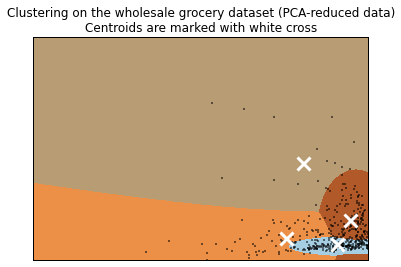

In [35]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

 Central objects in each cluster are 4 types of customers. 
 From my previous ICA analysis I conclude the there should have 4 type of customers,
which are
 1. restaurant(milk,grocery and detergents paper)
 2. fresh market(fresh)
 3. coffee shop (milk, detergents paper and delicatessen)
 4. deli counter(fresh,frozen and delicatessen)
 
 This graph x-axis is Fresh.
 y-axis is combination of Milk, Grocery and Detergent paper.
 And from above clustering visualization, 
  - blue cluster is fresh market because it locate at area which has high amount of fresh and low amount of others.
  - brown cluster is deli counter because of high fresh and a little bit high Milk, Grocery and Detergent paper amount.
  - orange cluster is coffee shop because of low value in both x and y axis. 
  - light brown cluster is restaurant because it has high milk,grocery and detergents paper
  

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
I feel PCA give the most insight into the data. Because at first with many features I cannot understand what is important or not important. And PCA can tell the important component of features. In this case it tells that fresh and combination of milk, grocery and detergent paper are important components. And from this dimension reduced data I can use it to other technique, which is clustering.  


**9)** How would you use that technique to help the company design new experiments?

Answer: Knowledge of what type of customer and what do they buy would help designing new experiment. We can design what promotion target on customer type and see the result from them compare to previous sales data or compare customer's behaivor to difference type of customer.

**10)** How would you use that data to help you predict future customer needs?

Answer: We can cluster the customer type and label them a customer class, and use labeled data to train classification model and predict customer's class.
Then, we can use customer class to decide theirs needs and use number of customer for each class to predict customer need with regression method. 